dataset --> https://www.kaggle.com/hellbuoy/car-price-prediction

In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from feature_engine import categorical_encoders  as ct
from feature_engine.variable_transformers import PowerTransformer
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
#Load the data
data = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#Modify carName
def modified_car(df, var):
    df[var] = df[var].apply(lambda x : x.split()[0])
    return df[var]

In [5]:
data['CarName']=modified_car(data,'CarName')

In [6]:
#Getting data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [7]:
#Checking missing info
data.isnull().mean()*100

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [8]:
#car_ID is not significant in analysis so we can drop it
data=data.drop(labels='car_ID', axis=1)

In [9]:
# As symboling has labeled observation. So we can make it categororical for data analysis
data['symboling'] = data['symboling'].astype('object')

# Data Analysis

In [10]:
#Seggregate the data to categorical and numerical
cat_vars = [var for var in data.columns if data[var].dtype == 'object']
num_vars = [var for var in data.columns if data[var].dtype != 'object']

In [11]:
cat_vars, num_vars

(['symboling',
  'CarName',
  'fueltype',
  'aspiration',
  'doornumber',
  'carbody',
  'drivewheel',
  'enginelocation',
  'enginetype',
  'cylindernumber',
  'fuelsystem'],
 ['wheelbase',
  'carlength',
  'carwidth',
  'carheight',
  'curbweight',
  'enginesize',
  'boreratio',
  'stroke',
  'compressionratio',
  'horsepower',
  'peakrpm',
  'citympg',
  'highwaympg',
  'price'])

In [12]:
# Method to get  the value sum of categorical variable's label 
def cat_sum(df, var):
    return df.groupby(var)['price'].sum()

In [13]:
for var in cat_vars:
    print(cat_sum(data, var))
    print('===========================')

symboling
-2     47345.000
-1    381275.000
 0    962586.667
 1    542047.000
 2    323497.000
 3    464975.000
Name: price, dtype: float64
CarName
Nissan           5499.000
alfa-romero     46495.000
audi           125014.167
bmw            208950.000
buick          269176.000
chevrolet       18021.000
dodge           70879.000
honda          106401.000
isuzu           35666.000
jaguar         103800.000
maxda           11290.000
mazda          169809.000
mercury         16503.000
mitsubishi     120117.000
nissan         181983.000
peugeot        170380.000
plymouth        55744.000
porcshce        32528.000
porsche        124474.500
renault         19190.000
saab            91340.000
subaru         102495.000
toyota         300596.000
toyouta         15750.000
vokswagen        7775.000
volkswagen      91580.000
volvo          198695.000
vw              21575.000
Name: price, dtype: float64
fueltype
diesel     316763.000
gas       2404962.667
Name: price, dtype: float64
aspiration
std 

In [14]:
# Method to visualise the value sum of categorical variable's label 
def cat_analysis(df, var):
    df.groupby(var)['price'].sum().plot.bar()
    plt.xlabel(var)
    plt.ylabel('Sum')
    plt.title(var)
    plt.show()

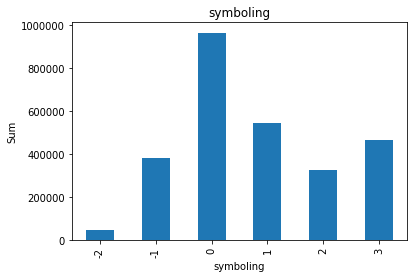

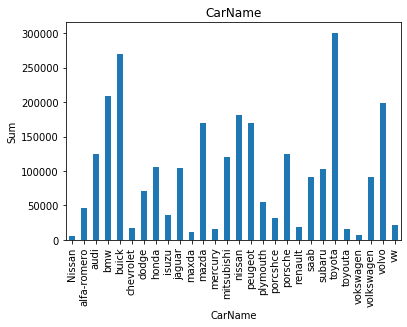

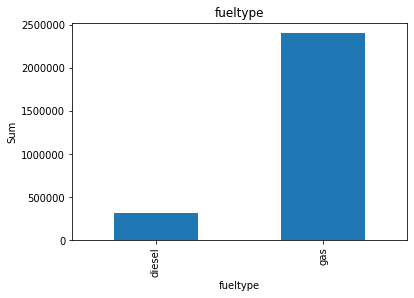

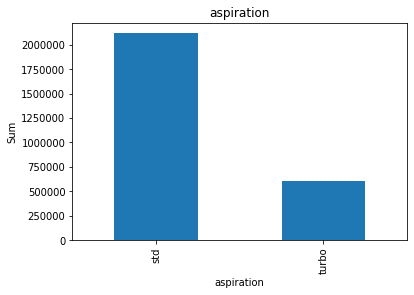

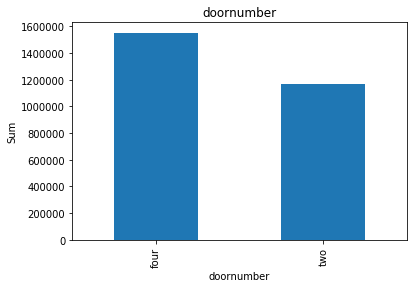

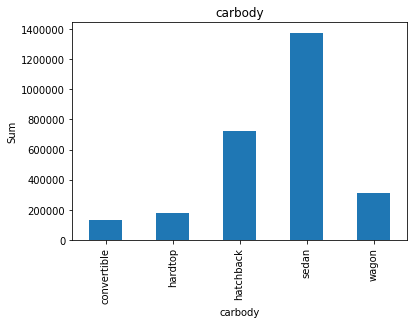

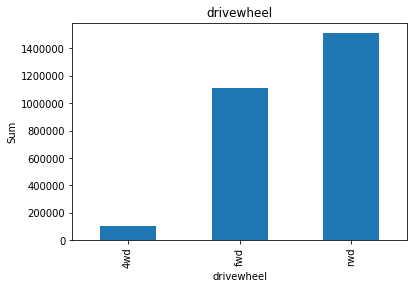

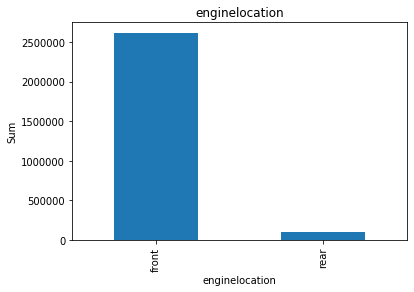

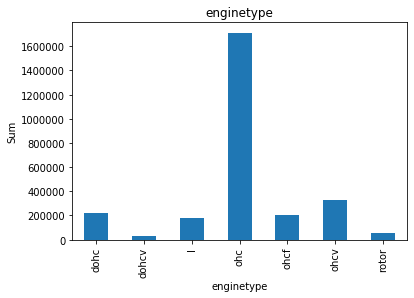

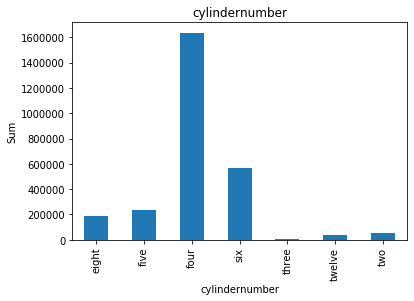

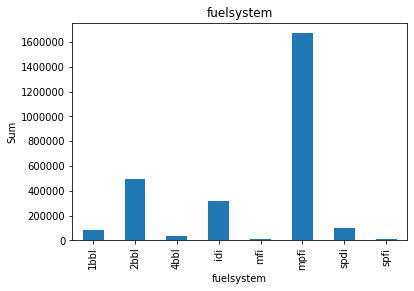

In [15]:
for var in cat_vars:
    cat_analysis(data, var)

In [16]:
#Method to check the cardinality of the categorical data
def cardinality(df, var):
    cardinal_count = data.groupby(var)[var].count()
    return cardinal_count

In [17]:
for var in cat_vars:
    print(cardinality(data,var))

symboling
-2     3
-1    22
 0    67
 1    54
 2    32
 3    27
Name: symboling, dtype: int64
CarName
Nissan          1
alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
maxda           2
mazda          15
mercury         1
mitsubishi     13
nissan         17
peugeot        11
plymouth        7
porcshce        1
porsche         4
renault         2
saab            6
subaru         12
toyota         31
toyouta         1
vokswagen       1
volkswagen      9
volvo          11
vw              2
Name: CarName, dtype: int64
fueltype
diesel     20
gas       185
Name: fueltype, dtype: int64
aspiration
std      168
turbo     37
Name: aspiration, dtype: int64
doornumber
four    115
two      90
Name: doornumber, dtype: int64
carbody
convertible     6
hardtop         8
hatchback      70
sedan          96
wagon          25
Name: carbody, dtype: int64
drivewheel
4wd      9
fwd    120
rwd    

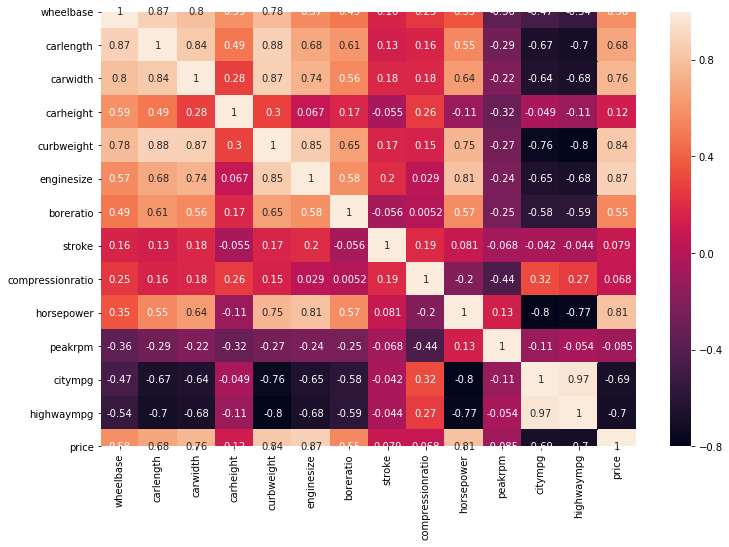

In [18]:
#Analyse using heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True)

# Feature Engineering

In [19]:
# Method to select the most frequent labels in categorical variable
def frequent_vars(df):
    frequent_dict = {}
    for var in cat_vars:
        tmp = df.groupby(var)[var].count()/len(df)
        tmp = [a for a in tmp.index if tmp[a]>0.01]
        frequent_dict[var] = tmp
    return frequent_dict

In [20]:
frequent_category = frequent_vars(data)
frequent_category

{'symboling': [-2, -1, 0, 1, 2, 3],
 'CarName': ['alfa-romero',
  'audi',
  'bmw',
  'buick',
  'chevrolet',
  'dodge',
  'honda',
  'isuzu',
  'jaguar',
  'mazda',
  'mitsubishi',
  'nissan',
  'peugeot',
  'plymouth',
  'porsche',
  'saab',
  'subaru',
  'toyota',
  'volkswagen',
  'volvo'],
 'fueltype': ['diesel', 'gas'],
 'aspiration': ['std', 'turbo'],
 'doornumber': ['four', 'two'],
 'carbody': ['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'],
 'drivewheel': ['4wd', 'fwd', 'rwd'],
 'enginelocation': ['front', 'rear'],
 'enginetype': ['dohc', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'],
 'cylindernumber': ['eight', 'five', 'four', 'six', 'two'],
 'fuelsystem': ['1bbl', '2bbl', '4bbl', 'idi', 'mpfi', 'spdi']}

In [21]:
#Encode the labels of categorical variable as Rare which is not present in the frequent labels
def encode_rare(df):
    for var in cat_vars:
        df[var] = np.where(df[var].isin(frequent_category[var]), df[var], 'Rare')
    return df

In [22]:
data = encode_rare(data)

The columns 'citympg' and 'highwaympg' are almost perfectly  correlated. So we can drop any of one.

In [23]:
#Seggregate the data to X and y
X = data[[var for var in data.columns if var not in ['price','highwaympg']]]
y = data['price']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [25]:
#Update numerical column
num_vars = [var for var in num_vars if var not in ['price','highwaympg']]

In [26]:
#Transform the variable for more Gaussian Approximation
vt = PowerTransformer(exp=0.2, variables=num_vars)
vt.fit(X_train)

PowerTransformer(exp=0.2,
                 variables=['wheelbase', 'carlength', 'carwidth', 'carheight',
                            'curbweight', 'enginesize', 'boreratio', 'stroke',
                            'compressionratio', 'horsepower', 'peakrpm',
                            'citympg'])

In [27]:
#Encode the categorical variable
encoder = ct.OneHotCategoricalEncoder(variables=cat_vars)
encoder.fit(X_train)

OneHotCategoricalEncoder(variables=['symboling', 'CarName', 'fueltype',
                                    'aspiration', 'doornumber', 'carbody',
                                    'drivewheel', 'enginelocation',
                                    'enginetype', 'cylindernumber',
                                    'fuelsystem'])

In [28]:
#Transform the variable
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

# Train the model

In [29]:
#Train Lasso Model
for alpha in [0.1,1.0,2.0,3.0,4.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train,y_train)
    y_pred_l = lasso.predict(X_test)
    print(f' for alpha = {alpha} training score {r2_score(y_train,lasso.predict(X_train))} and testing score {r2_score(y_test, y_pred_l)}')

 for alpha = 0.1 training score 0.9652216415802729 and testing score 0.8992848538998506
 for alpha = 1.0 training score 0.9650466105100282 and testing score 0.9048770809345116
 for alpha = 2.0 training score 0.9645667035175155 and testing score 0.9087784890790382
 for alpha = 3.0 training score 0.9638328785007706 and testing score 0.9113038503242987
 for alpha = 4.0 training score 0.9628233013470399 and testing score 0.9135170652822745


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 149647718.5790979, tolerance: 856038.1858725842
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130800695.22461803, tolerance: 856038.1858725842
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90103949.79193833, tolerance: 856038.1858725842
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

In [30]:
#Train Ridge Model
for alpha in [0.1,1.0,2.0,3.0,4.0, 5.0, 6.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    y_pred_r = ridge.predict(X_test.fillna(value=0))
    print(f'for alpha {alpha} training score {r2_score(y_train,ridge.predict(X_train))} and testing score {r2_score(y_test, y_pred_r)}')

for alpha 0.1 training score 0.9641944179833841 and testing score 0.9227759279258186
for alpha 1.0 training score 0.9533410963271678 and testing score 0.9374092708652821
for alpha 2.0 training score 0.9454327460072279 and testing score 0.9335797971727295
for alpha 3.0 training score 0.9392753220272515 and testing score 0.9292269775331335
for alpha 4.0 training score 0.9340917052957088 and testing score 0.9251628442464128
for alpha 5.0 training score 0.9295720030331918 and testing score 0.9214718065338597
for alpha 6.0 training score 0.9255511197992798 and testing score 0.9181355240021615


In [31]:
#Train AdaAdaBoostRegressor model
for l in [0.001,0.01,0.1,1.0]:
    adaboost = AdaBoostRegressor(base_estimator=Ridge(alpha=5.0), learning_rate=l)
    adaboost.fit(X_train,y_train)
    y_pred_a = adaboost.predict(X_test)
    print(f'for learning_rate {l} training score {r2_score(y_train,adaboost.predict(X_train))} and testing score {r2_score(y_test, y_pred_a)}')

for learning_rate 0.001 training score 0.9356604921118896 and testing score 0.9203098608175333
for learning_rate 0.01 training score 0.937712023474378 and testing score 0.9190013831197478
for learning_rate 0.1 training score 0.9414083733281754 and testing score 0.9131817158585271
for learning_rate 1.0 training score 0.9398205665536978 and testing score 0.8972044144186803


In [32]:
#Train the RandomForest Model
for d in [3.0,4.0,5.0,6.0]:
    rf = RandomForestRegressor(n_estimators=100,max_depth=d)
    rf.fit(X_train,y_train)
    y_pred_rf = rf.predict(X_test)
    print(f'for depth {d} training score {r2_score(y_train,rf.predict(X_train))} and testing score {r2_score(y_test, y_pred_rf)}')

for depth 3.0 training score 0.9396168539252024 and testing score 0.9086322153268402
for depth 4.0 training score 0.9615541826458193 and testing score 0.9155202155649702
for depth 5.0 training score 0.974034110459788 and testing score 0.916279145587107
for depth 6.0 training score 0.9783140141449345 and testing score 0.9138638371359232
